# **Space X  Falcon 9 First Stage Landing Prediction**


## Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   Here we will create a machine learning pipeline  to predict if the first stage will land or not.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Import Libraries and Define Auxiliary Functions


We will import the following libraries 


In [162]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


### Here we want know more about creating function, These four part of cods are out of  project pipline.

In [163]:
def add(a):
    """ for add"""
    b=a+3
    c=a+b
    print(c)

In [164]:
add(2)

7


In [165]:
def my_func():
    x = 10
    print("Value inside function:",x)

In [166]:
my_func()

Value inside function: 10


# This function is to plot the confusion matrix for the project.


In [167]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


In [168]:
data = pd.read_csv('dataset_falcon9.csv')

data.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [169]:
Preprocessed = pd.read_csv('preprocessed_dataset.csv')
Preprocessed.head(100)

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,15400.000000,2,1,1,1,5.0,2,1,0,...,0,0,0,0,0,0,0,0,1,0
86,86,15400.000000,3,1,1,1,5.0,2,1,0,...,0,0,0,0,0,0,1,0,0,0
87,87,15400.000000,6,1,1,1,5.0,5,1,0,...,0,0,0,1,0,0,0,0,0,0
88,88,15400.000000,3,1,1,1,5.0,2,1,0,...,0,0,0,0,0,0,0,0,1,0


In [170]:
Preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     int64  
 4   Reused                               90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     int64  
 10  Orbit_GEO                            90 non-null     int64  
 11  Orbit_GTO                         

## Define X ,Y

In [171]:
X = Preprocessed.drop("Class", axis=1)
Y = Preprocessed["Class"]

In [172]:
X

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,15400.000000,2,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,86,15400.000000,3,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,87,15400.000000,6,1,1,1,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,88,15400.000000,3,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


## These five lines of code are not in project pipeline

In [173]:
X['PayloadMass'].mean()

np.float64(6104.959411764707)

In [174]:
X['PayloadMass'].std()

4694.671719712728

In [175]:
X['Flights'].mean()

np.float64(1.788888888888889)

In [176]:
X['Flights'].std()

1.2131715741866367

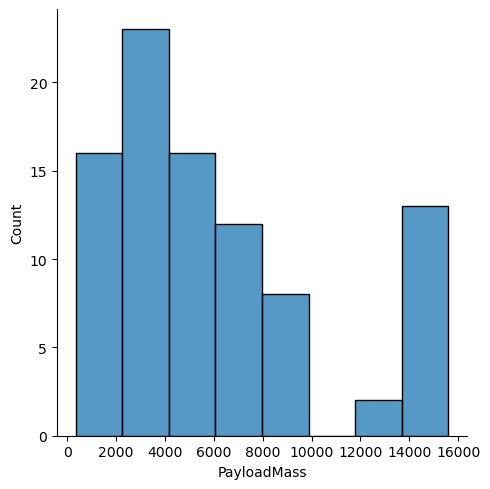

In [177]:
sns.displot(data=X, x="PayloadMass")

## Standardize Features

In [178]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [179]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.712912,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.674419,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.635927,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.597434,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-1.558942,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.597434,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.635927,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.674419,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


## These four lines of code are not in project pipeline

In [180]:
X['PayloadMass'].mean()

np.float64(-1.4186183092432555e-16)

In [181]:
X['PayloadMass'].std()

1.0056022847309865

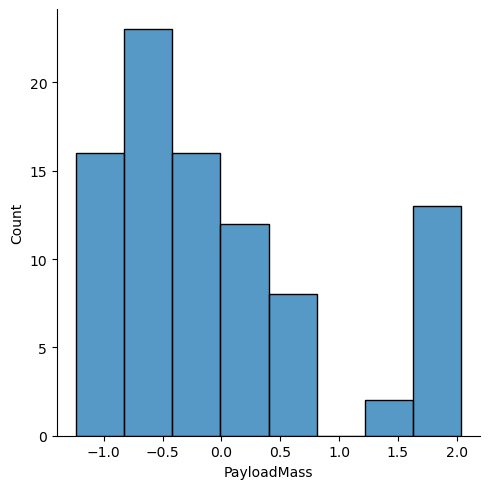

In [182]:
sns.displot(data=X, x="PayloadMass")

## Train- Test Split


In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

## Logistic Regression


In [184]:
lr=LogisticRegression()
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters,cv=4)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [185]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.875


Calculate the accuracy on the test data using the method <code>score</code>:


In [186]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,Y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,Y_test)

0.8888888888888888

## Confusion Matrix:


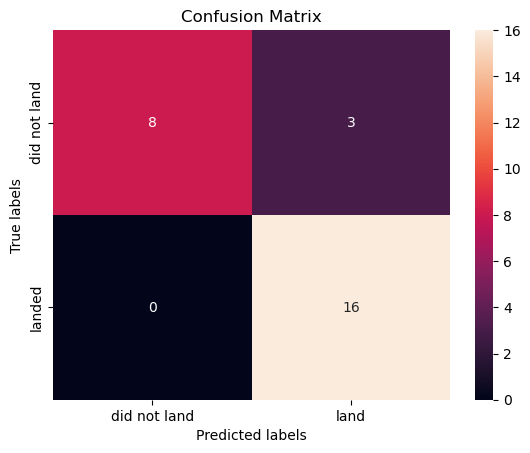

In [187]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Support Vector Machine


In [188]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': (0.5, 1, 1.5)}
svm = SVC()

In [189]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [190]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'sigmoid'}
accuracy : 0.9380952380952381


Calculate the accuracy on the test data using the method <code>score</code>:


In [191]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
svm_cv.score(X_test,Y_test)

0.8888888888888888

### Confusion Matrix


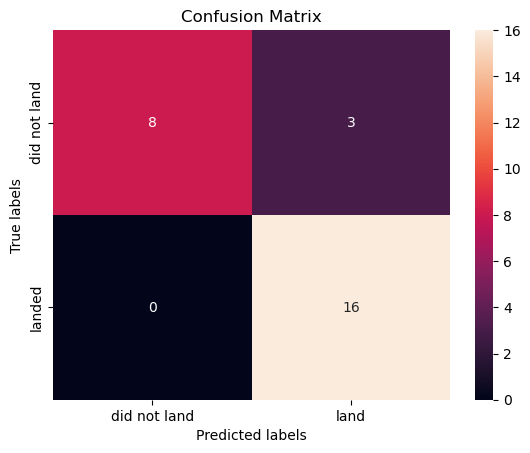

In [192]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Decision Trees


In [193]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [194]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [195]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 1.0


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [196]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)

0.8888888888888888

### Confusion Matrix


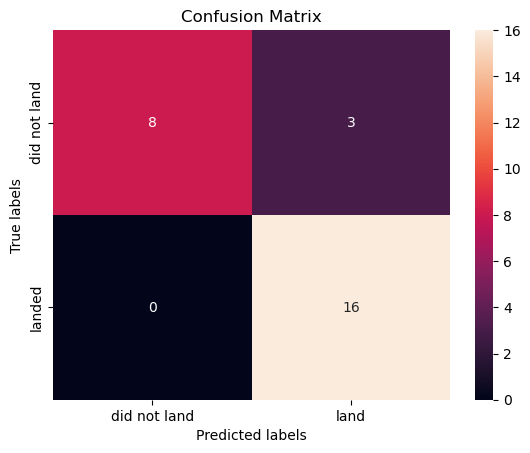

In [197]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## K Nearest Neighbors

In [198]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [199]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [200]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.8928571428571429


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [201]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

0.8518518518518519

### Confusion Matrix


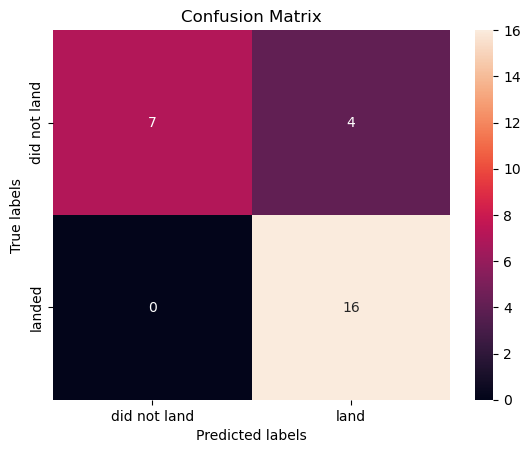

In [202]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Find the method performs best:


In [203]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors']
[0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8518518518518519]


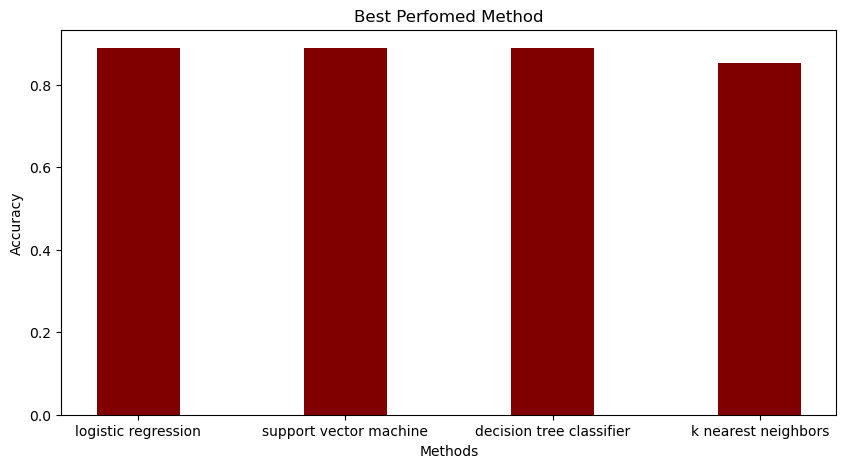

In [204]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, accu, color ='maroon',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

# SAVE-LOAD the trained model using pickle 


In [205]:
import pickle

In [206]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(logreg_cv,f)


## ROC Curve

In [207]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'Area Under ROC')

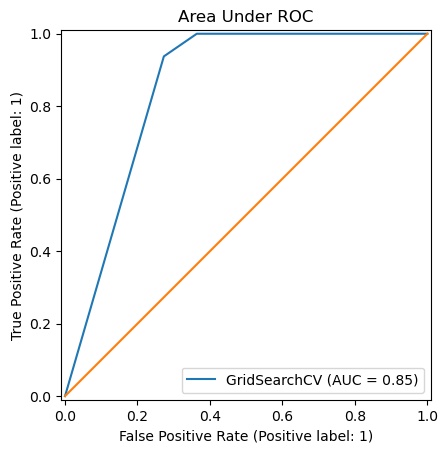

In [208]:
RocCurveDisplay.from_estimator(knn_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')

# Imbalance Data

<Axes: xlabel='Class', ylabel='count'>

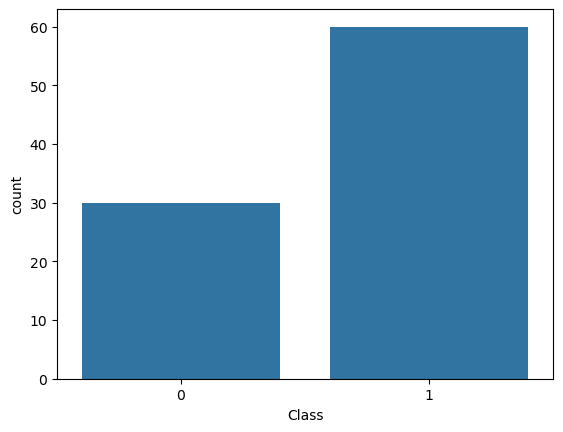

In [209]:
sns.countplot(x ='Class', data = data)